In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
data = np.genfromtxt("190627A.txt", dtype=None,names = ['time','t_errUp', 't_errdwn', 'Flux', 'Fluxup','Flux_dwn'],usecols=(0,1,2,3,4,5),unpack=True)

data=np.array(data)

t_050315 = data[0,:]
t_050315_up = data[1,:]
t_050315_down = data[2,:]
Flux_050315 = data[3,:]
Flux_050315_up = data[4,:]
Flux_050315_down = data[5,:]

In [3]:
def linear_fit(x,m,c):
    return  c*x**(-m)

In [4]:
params, covariance = curve_fit(f = linear_fit, xdata = t_050315, ydata = Flux_050315)

print('Slope (m) is ', params[0])
print('Intercept (c) is ', params[1])
print(covariance)

Slope (m) is  0.6275565672842934
Intercept (c) is  5.5272216078825556e-09
[[1.65175877e-03 4.82323530e-11]
 [4.82323530e-11 1.42817316e-18]]


In [5]:
standarddevparams2 = np.sqrt(np.diag(covariance))
residuals = Flux_050315 - linear_fit(t_050315,params[0],params[1])
squaresumofresiduals = np.sum(residuals**2)
squaresum = np.sum((Flux_050315-np.mean(Flux_050315))**2)
R2 = 1 - (squaresumofresiduals/squaresum)

print('The value of fitting parameters with their errors')
print('The slope (m) is ', params[0],'+-', standarddevparams2[0])
print('The intercept (c) is ', params[1],'+-', standarddevparams2[1])
print('The R^2 value is ', R2)

The value of fitting parameters with their errors
The slope (m) is  0.6275565672842934 +- 0.04064183515964053
The intercept (c) is  5.5272216078825556e-09 +- 1.1950619890541018e-09
The R^2 value is  0.8709516127885273


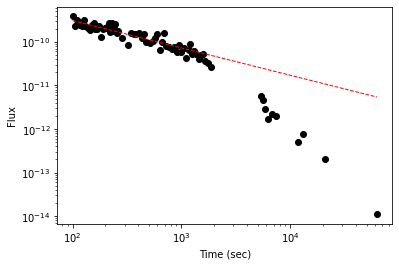

In [6]:
plt.scatter(t_050315,Flux_050315, c='black')
plt.xlabel('Time (sec)')
plt.ylabel('Flux')
#plt.ylim(1e-12,1e-10)
#plt.xlim(80,1e3)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.plot(t_050315, linear_fit(t_050315,params[0],params[1]),c='red',ls='--',lw=1)
plt.savefig('190627A_fit.png')
plt.show();

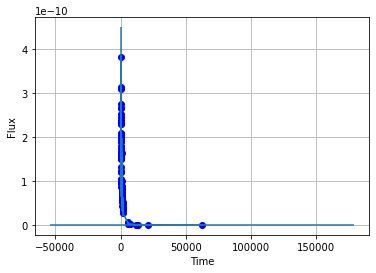

In [7]:
plt.plot(t_050315, Flux_050315, 'bo')
plt.errorbar(t_050315, Flux_050315, xerr=t_050315_up,  yerr=Flux_050315_up)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.grid()
plt.savefig('190627A_err.png')
#plt.savefig('GRB180720C.pdf')
plt.show()